In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/wetland/NormalDEM_NWI_RCP45, 2100, MEAN SLR RCP4.5 .CSV', skiprows=3)
cols = ['Date', 'Developed Dry Land', 'Undeveloped Dry Land', 'Swamp',
       'Cypress Swamp', 'Inland-Fresh Marsh', 'Tidal-Fresh Marsh',
       'Trans. Salt Marsh', 'Regularly-Flooded Marsh', 'Mangrove',
       'Estuarine Beach', 'Tidal Flat', 'Ocean Beach', 'Ocean Flat',
       'Rocky Intertidal', 'Inland Open Water', 'Riverine Tidal',
       'Estuarine Open Water', 'Tidal Creek', 'Open Ocean',
       'Irreg.-Flooded Marsh', 'Inland Shore', 'Tidal Swamp']
categories = {
    'MANGROVE'   : ["Trans. Salt Marsh", "Mangrove", "Irreg.-Flooded Marsh"],
    'TIDAL_FLAT' : ["Regularly-Flooded Marsh", "Estuarine Beach", "Tidal Flat", "Tidal Swamp"],
    'REEF'       : ["Ocean Flat", "Rocky Intertidal"]
}
df = df[cols]
df = df.loc[:, (df != 0).any(axis=0)]
df.head()

,Date,Developed Dry Land,Undeveloped Dry Land,Swamp,Inland-Fresh Marsh,Trans. Salt Marsh,Regularly-Flooded Marsh,Mangrove,Estuarine Beach,Tidal Flat,Ocean Beach,Ocean Flat,Rocky Intertidal,Inland Open Water,Riverine Tidal,Estuarine Open Water,Tidal Creek,Open Ocean,Irreg.-Flooded Marsh,Tidal Swamp
0,0,4155.5000,692.1600,4925.7800,96.7800,0.0000,168.6100,948.9100,108.1600,325.0500,99.9300,923.0700,92.7200,159.1700,116.2700,96.2200,10.92,51992.4600,0.0000,102.0100
1,2011,3860.1343,432.4257,4909.2242,94.5910,341.4566,211.8343,895.4063,102.1291,316.5589,272.1468,876.3750,88.1846,155.0284,108.7382,186.7073,10.92,52051.2767,5.0600,95.5228
2,2025,3849.6305,279.6913,4975.2220,92.7312,164.5736,486.6785,891.9481,93.2385,291.7041,238.6074,863.1187,87.2857,152.9477,107.7779,237.3260,10.92,52095.5953,0.3677,94.3556
3,2050,3830.1261,269.5595,4949.7342,87.6565,113.2958,590.4803,885.8192,79.9714,264.5822,222.2352,839.4910,85.2004,146.7723,103.5636,313.1159,10.92,52130.1513,1.5170,89.5279
4,2075,319.4845,265.6784,4912.9729,83.7197,2902.8615,639.2757,880.2087,67.8127,236.5166,917.2503,815.8414,79.9491,143.0994,95.2422,390.2790,10.92,52167.2765,4.9801,80.3513


In [3]:
# remove '2011' row
df = df.drop(labels=1 , axis=0)
# rename first row (Date = 0) to 2011
df.at[0,'Date'] = 2011

In [4]:
df

,Date,Developed Dry Land,Undeveloped Dry Land,Swamp,Inland-Fresh Marsh,Trans. Salt Marsh,Regularly-Flooded Marsh,Mangrove,Estuarine Beach,Tidal Flat,Ocean Beach,Ocean Flat,Rocky Intertidal,Inland Open Water,Riverine Tidal,Estuarine Open Water,Tidal Creek,Open Ocean,Irreg.-Flooded Marsh,Tidal Swamp
0,2011,4155.5000,692.1600,4925.7800,96.7800,0.0000,168.6100,948.9100,108.1600,325.0500,99.9300,923.0700,92.7200,159.1700,116.2700,96.2200,10.92,51992.4600,0.0000,102.0100
2,2025,3849.6305,279.6913,4975.2220,92.7312,164.5736,486.6785,891.9481,93.2385,291.7041,238.6074,863.1187,87.2857,152.9477,107.7779,237.3260,10.92,52095.5953,0.3677,94.3556
3,2050,3830.1261,269.5595,4949.7342,87.6565,113.2958,590.4803,885.8192,79.9714,264.5822,222.2352,839.4910,85.2004,146.7723,103.5636,313.1159,10.92,52130.1513,1.5170,89.5279
4,2075,319.4845,265.6784,4912.9729,83.7197,2902.8615,639.2757,880.2087,67.8127,236.5166,917.2503,815.8414,79.9491,143.0994,95.2422,390.2790,10.92,52167.2765,4.9801,80.3513
5,2100,302.7537,260.2031,4879.0315,81.3407,2906.3336,693.7235,874.8637,54.5363,205.6123,901.5194,792.4252,72.4813,140.0822,82.1639,475.5988,10.92,52204.5712,4.0785,71.4813


In [5]:
for category, habitats in categories.items():
    df[category] = df[habitats].sum(axis=1)
    df = df.drop(labels=habitats, axis=1)
    

In [6]:
df

,Date,Developed Dry Land,Undeveloped Dry Land,Swamp,Inland-Fresh Marsh,Ocean Beach,Inland Open Water,Riverine Tidal,Estuarine Open Water,Tidal Creek,Open Ocean,MANGROVE,TIDAL_FLAT,REEF
0,2011,4155.5000,692.1600,4925.7800,96.7800,99.9300,159.1700,116.2700,96.2200,10.92,51992.4600,948.9100,703.8300,1015.7900
2,2025,3849.6305,279.6913,4975.2220,92.7312,238.6074,152.9477,107.7779,237.3260,10.92,52095.5953,1056.8894,965.9767,950.4044
3,2050,3830.1261,269.5595,4949.7342,87.6565,222.2352,146.7723,103.5636,313.1159,10.92,52130.1513,1000.6320,1024.5618,924.6914
4,2075,319.4845,265.6784,4912.9729,83.7197,917.2503,143.0994,95.2422,390.2790,10.92,52167.2765,3788.0503,1023.9563,895.7905
5,2100,302.7537,260.2031,4879.0315,81.3407,901.5194,140.0822,82.1639,475.5988,10.92,52204.5712,3785.2758,1025.3534,864.9065


array([<matplotlib.axes._subplots.AxesSubplot object at 0x117b34588>,
      dtype=object)

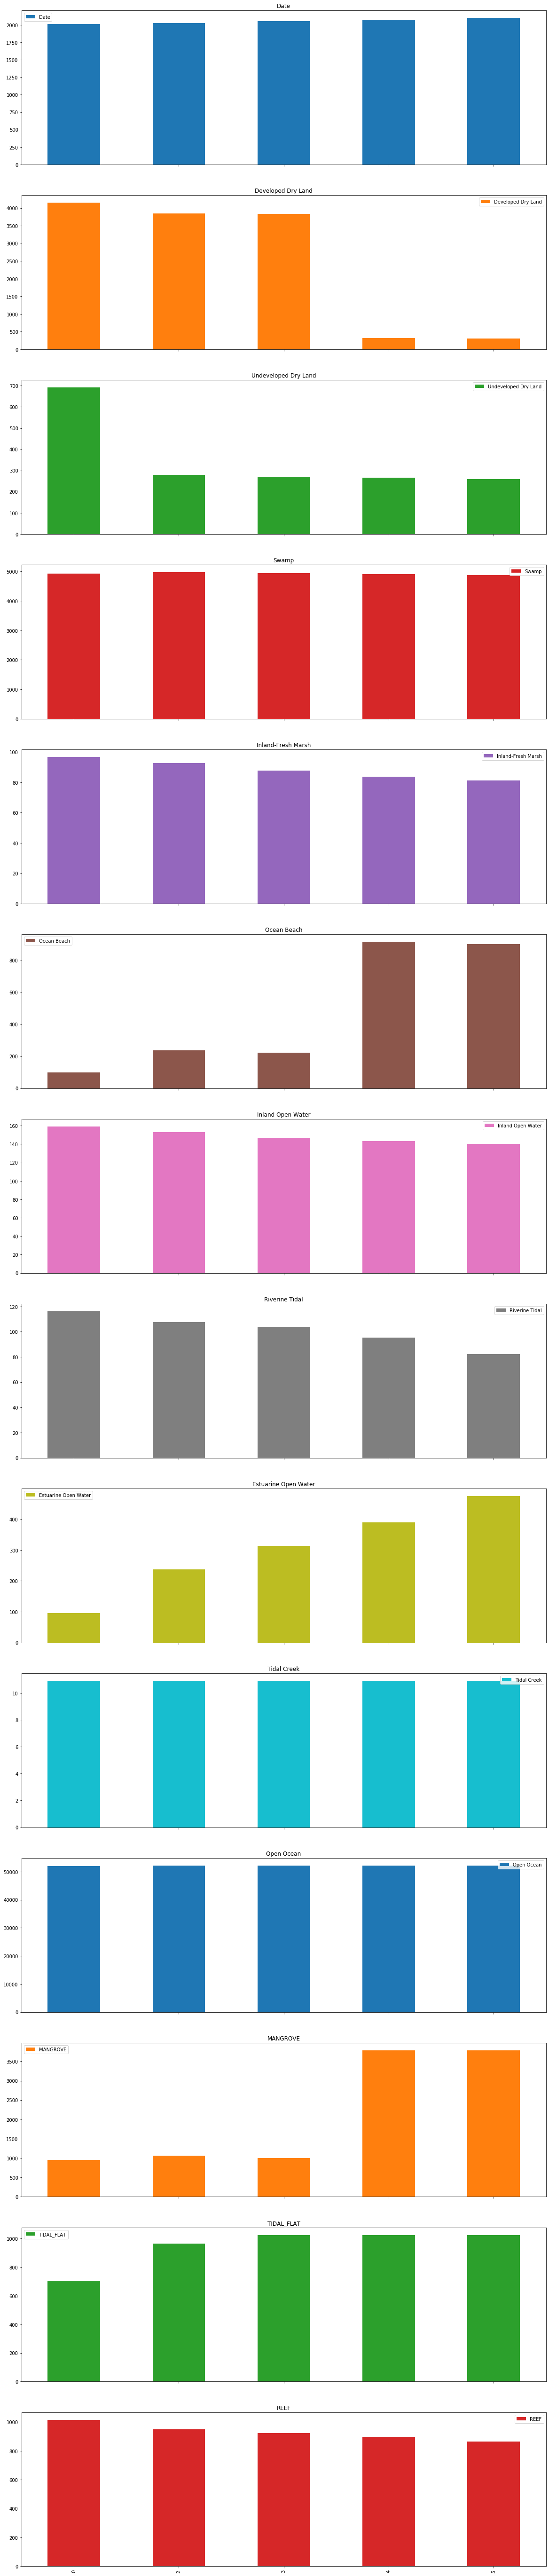

In [10]:
df.plot(kind='bar', subplots=True, figsize=(20, 100))

In [ ]:
# TODO: plot the following charts
# - absolute change (since 2011) for each year and habitat
# - percentage change (since 2011) for each year and habitat